# Re-run the dimension reduction analysis with linear models

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import analysis_pca
import pickle
from cbmanifold.linear_model import LinearModel


In [2]:
# load ../../models/linear_model_FN_PV_dim_reduced_20250529.pkl
with open('../../models/linear_model_FN_PV_dim_reduced_20250529.pkl', 'rb') as f:
    lmrs = pickle.load(f)

# Create a matrix by vertically stacking all rate matrices from the linear models
rate_matrix = np.vstack([lm.p for lm in lmrs])
drate_matrix = np.vstack([lm.dp for lm in lmrs])

# _ = plt.plot(rate_matrix.T)
rate_matrix.shape

(48, 500)

Dimensions: 1, Variance explained: 63.44255788713461
Dimensions: 2, Variance explained: 80.15800625704462
Dimensions: 3, Variance explained: 88.69154148482441
Dimensions: 4, Variance explained: 92.99160462579597
Dimensions: 5, Variance explained: 96.01736964881516
Dimensions to be reduced: 3


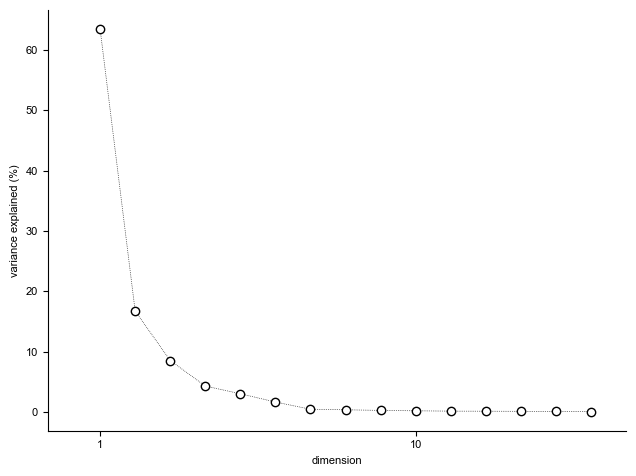

In [3]:
import cbmanifold as cbm
from cbmanifold.decomposition import pmPCA

dd, p, v = pmPCA(rate_matrix)
var_explained = dd/np.sum(dd)*1e2;
var_explained_cumsum = np.cumsum(var_explained);
for i in range(5):
    print(f'Dimensions: {i+1}, Variance explained: {var_explained_cumsum[i]}')

nmode = np.where(var_explained_cumsum > 87.5)[0][0]+1
print(f'Dimensions to be reduced: {nmode}')

fig, ax = plt.subplots()
_ = cbm.plot.plot_var_explained(var_explained, ax=ax)


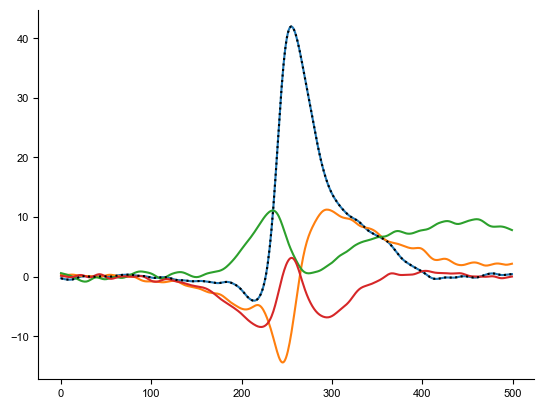

In [4]:
v[:, 1] = -v[:, 1]
p[:, 1] = -p[:, 1]
v[:, 2] = -v[:, 2]
p[:, 2] = -p[:, 2]
v[:, 3] = -v[:, 3]
p[:, 3] = -p[:, 3]

plt.plot((v[:,:4].T @ rate_matrix).T)
plt.plot(p[:,0], ':k')

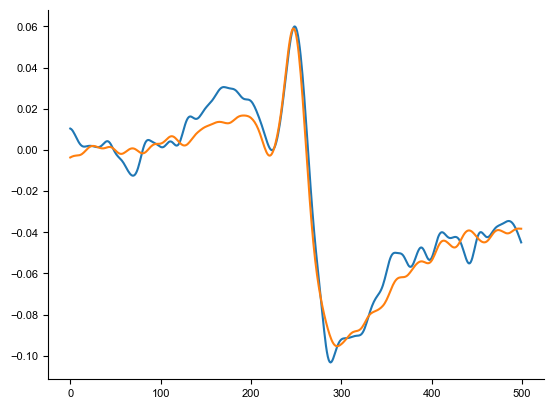

In [5]:
Wpca = v[:,:4]
rbar = Wpca @ p[:,:4].T

n = 19
plt.plot(rate_matrix[n]/np.linalg.norm(rate_matrix[n]))
plt.plot(rbar[n]/np.linalg.norm(rbar[n]))

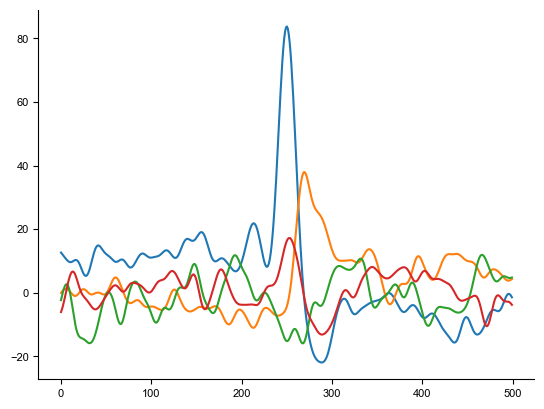

In [6]:
pp = p[:,:4].T
dpp = Wpca.T @ drate_matrix
plt.plot(dpp.T)

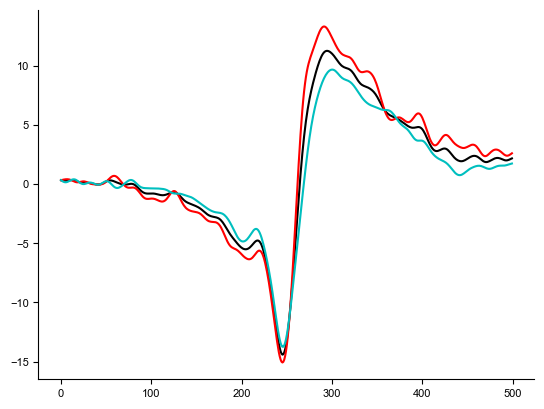

In [7]:
n = 1
plt.plot(pp[n,:], 'k')
plt.plot(pp[n,:] + 0.1*dpp[n,:], 'r')
plt.plot(pp[n,:] - 0.1*dpp[n,:], 'c')


/var/folders/dd/lzv3mtbd2555qjgqz9j9nbtc0000gn/T/ipykernel_77307/1607557695.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(pp[dim1,250] + prange[i]*dpp[dim1,250], pp[dim2,250] + prange[i]*dpp[dim2,250], 25, c=cols[i], zorder=2)
/var/folders/dd/lzv3mtbd2555qjgqz9j9nbtc0000gn/T/ipykernel_77307/1607557695.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(pp[dim1,220] + prange[i]*dpp[dim1,220], pp[

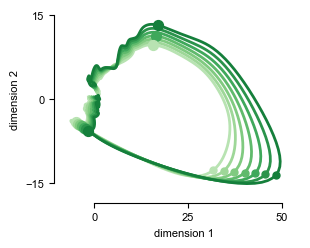

In [71]:
_, ax = plt.subplots(figsize=(3, 7/3))

# sample three colors from YIGn colormap
n_steps = 7
cols = plt.cm.Greens(np.linspace(0.3, 0.8, n_steps))
prange = np.linspace(-1, 1, n_steps)*0.1

dim1 = 0
dim2 = 1

for i in range(n_steps):

    ax.plot(pp[dim1,:] + prange[i]*dpp[dim1,:], pp[dim2,:] + prange[i]*dpp[dim2,:], c=cols[i], linewidth=2, zorder=1)

for i in range(n_steps):
    ax.scatter(pp[dim1,250] + prange[i]*dpp[dim1,250], pp[dim2,250] + prange[i]*dpp[dim2,250], 25, c=cols[i], zorder=2)

    ax.scatter(pp[dim1,220] + prange[i]*dpp[dim1,220], pp[dim2,220] + prange[i]*dpp[dim2,220], 50, c=cols[i], zorder=2)


d0 = 43
dplus = 38
dminus = 49

ax.scatter(pp[dim1,250+d0], pp[dim2,250+d0], 50, cols[-3])
ax.scatter(pp[dim1,250+dplus] + .1*dpp[dim1,250+dplus], pp[dim2,250+dplus] + .1*dpp[dim2,250+dplus], 50, cols[-1])
ax.scatter(pp[dim1,250+dminus] - .1*dpp[dim1,250+dminus], pp[dim2,250+dminus] - .1*dpp[dim2,250+dminus], 50, cols[0])

plt.xlabel(f'dimension {dim1+1}')
plt.ylabel(f'dimension {dim2+1}')
ax.set_ylim(-16, 16)
ax.set_xlim(-7, 55)

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.spines['bottom'].set_bounds(0, 50)
ax.spines['left'].set_bounds(-15, 15)

ax.set(
    xticks=[0, 25, 50],
    yticks=[-15, 0, 15],
)

# plt.tight_layout()
plt.savefig('dim_reduction_linear_models_angle.pdf', dpi=300)


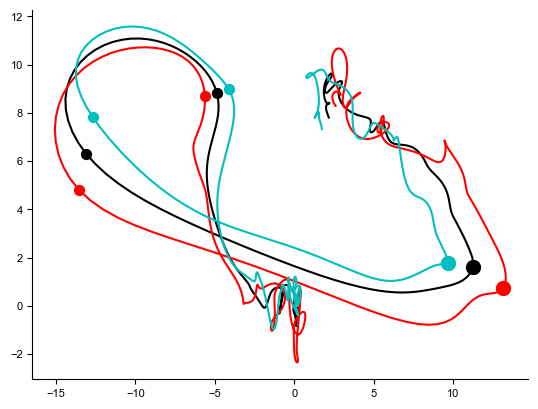

In [9]:
d1 = 1
d2 = 2
plt.plot(pp[d1,:], pp[d2,:], 'k')
plt.plot(pp[d1,:] + 0.1*dpp[d1,:], pp[d2,:] + 0.1*dpp[d2,:], 'r')
plt.plot(pp[d1,:] - 0.1*dpp[d1,:], pp[d2,:] - 0.1*dpp[d2,:], 'c')

plt.scatter(pp[d1,250], pp[d2,250], 50, 'k')
plt.scatter(pp[d1,250] + .1*dpp[d1,250], pp[d2,250] + .1*dpp[d2,250], 50, 'r')
plt.scatter(pp[d1,250] - .1*dpp[d1,250], pp[d2,250] - .1*dpp[d2,250], 50, 'c')

plt.scatter(pp[d1,220], pp[d2,220], 50, 'k')
plt.scatter(pp[d1,220] + .1*dpp[d1,220], pp[d2,220] + .1*dpp[d2,220], 50, 'r')
plt.scatter(pp[d1,220] - .1*dpp[d1,220], pp[d2,220] - .1*dpp[d2,220], 50, 'c')

d0 = 43
dplus = 38
dminus = 49

plt.scatter(pp[d1,250+d0], pp[d2,250+d0], 100, 'k')
plt.scatter(pp[d1,250+dplus] + .1*dpp[d1,250+dplus], pp[d2,250+dplus] + .1*dpp[d2,250+dplus], 100, 'r')
plt.scatter(pp[d1,250+dminus] - .1*dpp[d1,250+dminus], pp[d2,250+dminus] - .1*dpp[d2,250+dminus], 100, 'c')


## Check if the rate matrix can be further reduced down.


In [10]:
#For FN angle averaged PCA

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)
apca = analysis_pca.analysis_pca(Ts, data_cat, save_path)
data_cat_sm = apca.smoothing_data()  # Smoothed data
data = np.mean(data_cat_sm, axis=0)  # Anagle averged data
PCA_total = apca.pca_analy(data)  # PCA

Wa = PCA_total['v'][:4]  # Wight matrix from angle averaged PCA

NameError: name 'Ts' is not defined

In [3]:
#Multiply weight matrix (MWM) to each angle data

final_out = []
for a in range(8):
    out = Wa @ data_cat_sm[a]
    final_out.append(out)

final_out = np.array(final_out)

In [4]:
#Adjust MWM by subtract data point at -300 to -200ms

tmep_final = np.transpose(final_out,[2,0,1])
sTemplet = np.mean(tmep_final[:100], axis=0)
sTemplet = np.repeat(sTemplet[np.newaxis, :, :], 600, axis=0)
nfinal_out = np.transpose(tmep_final - sTemplet, [1, 2, 0])


#Adjust PCA by subtract data point at -300 to -200ms

tmep_final = PCA_total['p']
sTemplet = np.mean(tmep_final[:100], axis=0)
sTemplet = np.repeat(sTemplet[np.newaxis, :], 600, axis=0)
nPCA_out = tmep_final.T - sTemplet.T

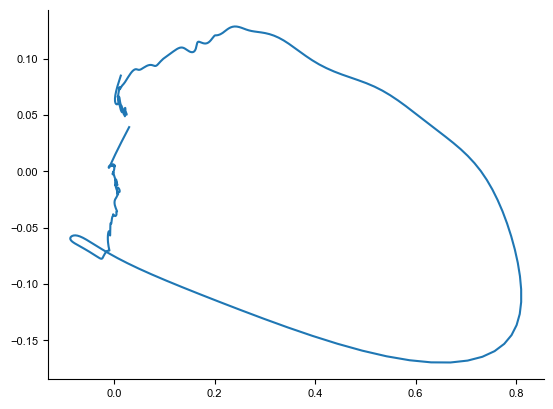

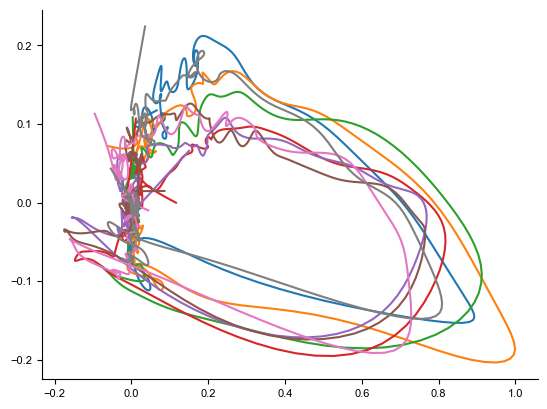

In [5]:
# Plotting

plt.figure()
plt.plot(nPCA_out[0], nPCA_out[1])

plt.figure()
for a in range(8):
    plt.plot(nfinal_out[a][0], nfinal_out[a][1])

Text(0.5, 0, '3D')

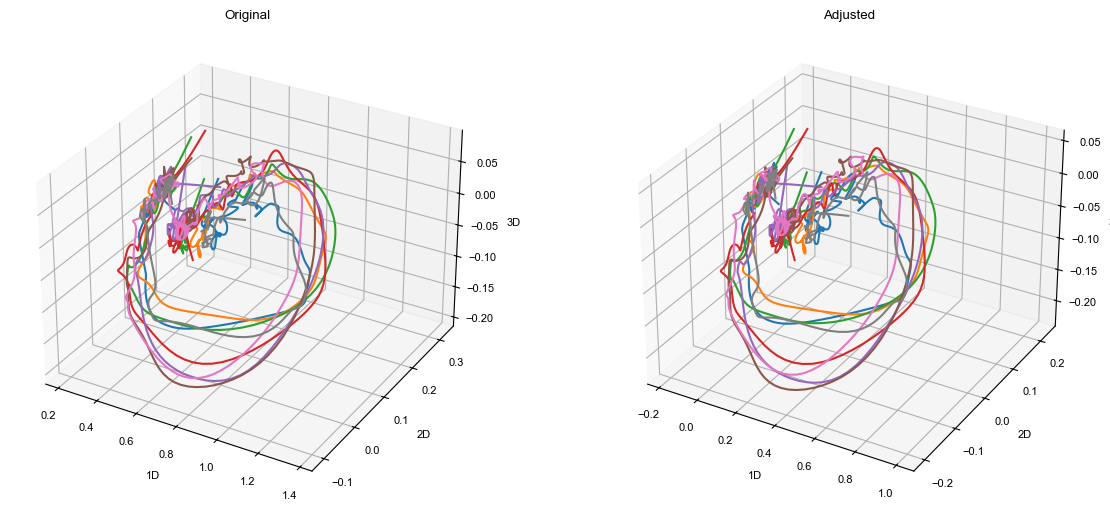

In [6]:
fig = plt.figure(constrained_layout=True,figsize=(12,5))
# subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1, 1])

# 3D plot of original data

# subfigs[0].subplots(1, 1)
ax = fig.add_subplot(1, 2, 1, projection='3d')
for a in range(8):
    X = final_out[a, 0]; Y = final_out[a, 1]; Z = final_out[a, 2]
    ax.plot(X, Y, Z, label='parametric curve')
ax.set_title("Original")
ax.set_xlabel('1D'); ax.set_ylabel('2D'); ax.set_zlabel('3D')

# 3D plot of adjusted data

# subfigs[1].subplots(1, 1, projection='3d')
ax = fig.add_subplot(1, 2, 2, projection='3d')
# ax = plt.figure().add_subplot(projection='3d')
for a in range(8):
    X = nfinal_out[a, 0]; Y = nfinal_out[a, 1]; Z = nfinal_out[a, 2]
    ax.plot(X, Y, Z, label='parametric curve')
ax.set_title("Adjusted")
ax.set_xlabel('1D'); ax.set_ylabel('2D'); ax.set_zlabel('3D')

# ax.view_init(elev=0, azim=-120)

In [7]:
nfinal_out[0].var()

np.float64(0.015412136293876878)

In [8]:
# Fitting

pca_p = nPCA_out[:4]
time = np.linspace(-300, 300, 600)

r_s_total = []
for a in range(8):
    resid = np.linalg.norm(pca_p - nfinal_out[a], axis=1)**2
    r_s = 1 - resid / (nfinal_out[a].size * nfinal_out[a].var())
    r_s_total.append(r_s)

r_s_total = np.array(r_s_total)

Text(0.5, 1.0, 'direction=4, pc=0, R^2=0.9756770942464006')

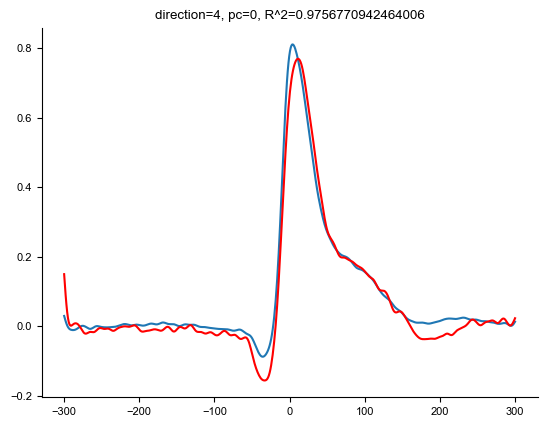

In [9]:
# Plotting

a = 4
b = 0

r_s = r_s_total[a][b]
plt.plot(time, pca_p[b], time, nfinal_out[a][b], 'r')
plt.title(f'direction={a}, pc={b}, R^2={r_s}')

## Onset delay

In [11]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib
import matplotlib.pyplot as plt
import analysis_pca

Ts = 1000
data_path = r'C:\Users\IBS\Desktop\python_code_N2'
save_path = r'C:\Users\IBS\Desktop\figures'

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)

val_cat = np.array(val_cat)[:,:8]
data_cat = np.array(data_cat)[:, :8]

/opt/miniforge3/envs/cbmanifold/lib/python3.11/site-packages/sklearn/manifold/_mds.py:632: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


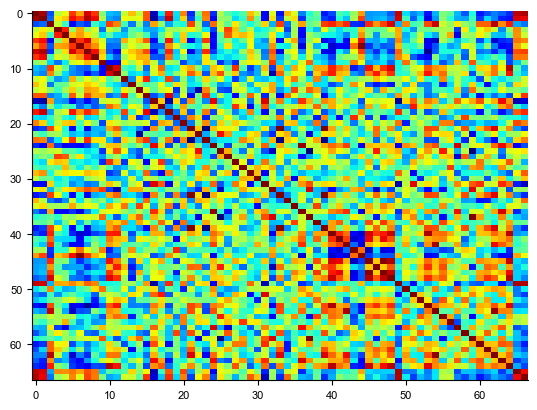

In [12]:
import preprecessing_distMat

pdm = preprecessing_distMat.preprecessing_distMat(Ts, data_cat, val_cat, save_path)
onset_delay = pdm.peak_delay(win=20)
p_t = pdm.peak_MDS(onset_delay, True)

(np.float64(-3.930368064526874),
 np.float64(3.97640121212645),
 np.float64(-4.608530487613891),
 np.float64(5.543546924808358))

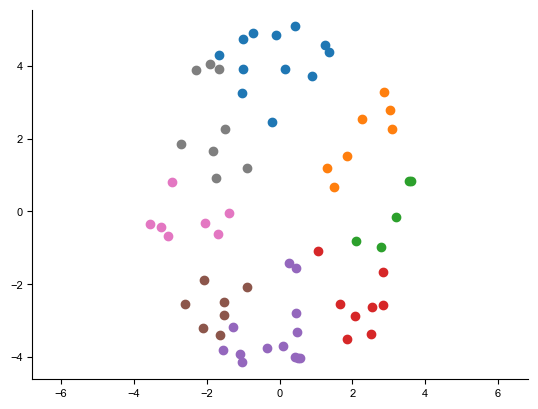

In [14]:
#Sorting cell by degree

from scipy.spatial import distance
from math import degrees

sp1 = np.argsort(p_t[:,1])[::-1][:5]
sp2 = np.argsort(np.abs(p_t[sp1, :][:, 0]))
sp = sp1[sp2[0]]

# p = p_t[sp]
cent = np.mean(p_t, axis=0)
p = [cent[0], cent[1] + 6]

deg_f = []
for a in range(len(p_t)):
    q = p_t[a]
    cos = 1-distance.cosine(p, q)
    deg = degrees(np.arccos(cos))
    if q[0] - p[0] < 0:
        deg = 360 - deg

    deg_f.append(deg)
deg_f = np.array(deg_f)

deg_idx = np.linspace(0, 360, 9) + 22.5
deg_idx = np.append(deg_idx[7], deg_idx[:7])

C_cat = []
for a in range(len(deg_idx)):
    if a == 0:
        C = np.where(np.logical_or(deg_f > deg_idx[a], deg_f <= deg_idx[a+1]))
    elif a == 7:
        C = np.where(np.logical_and(deg_f > deg_idx[a], deg_f <= deg_idx[0]))
    else:
        C = np.where(np.logical_and(deg_f > deg_idx[a], deg_f <= deg_idx[a+1]))
    C_cat.append(C)

# plotting
for a in range(8):
    plt.scatter(p_t[[C_cat[a]],0], p_t[[C_cat[a]],1])
plt.axis('equal')

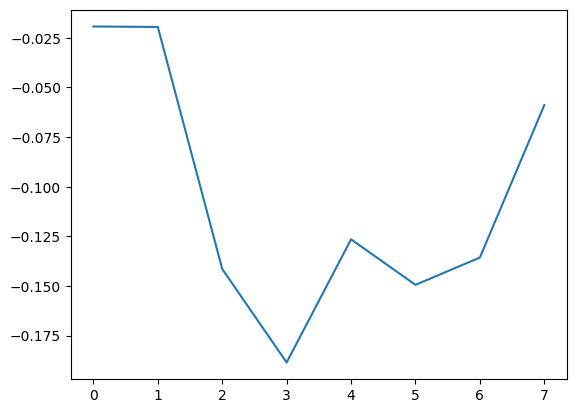

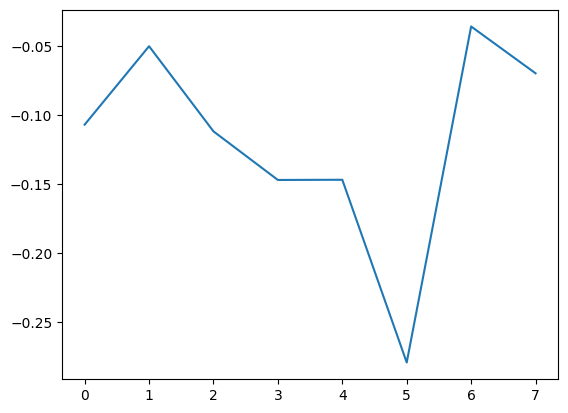

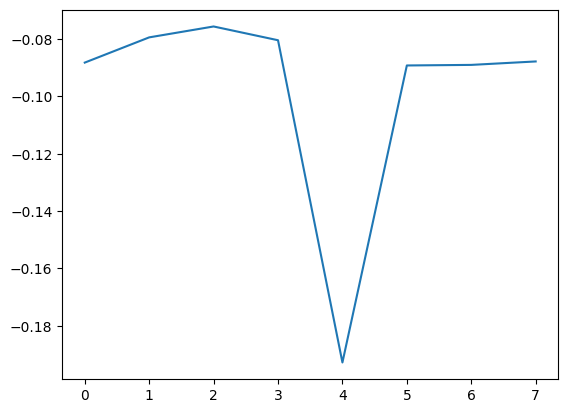

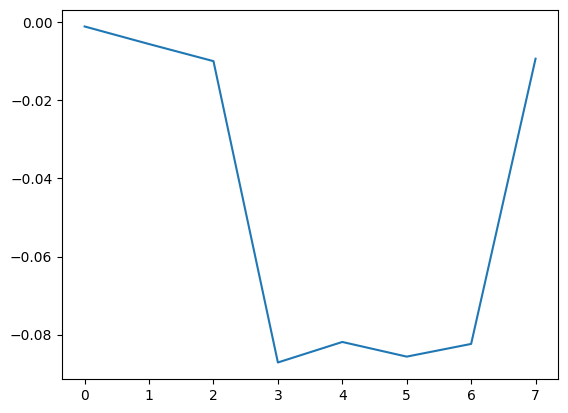

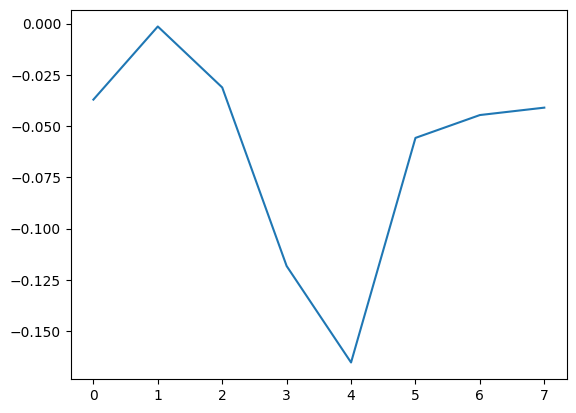

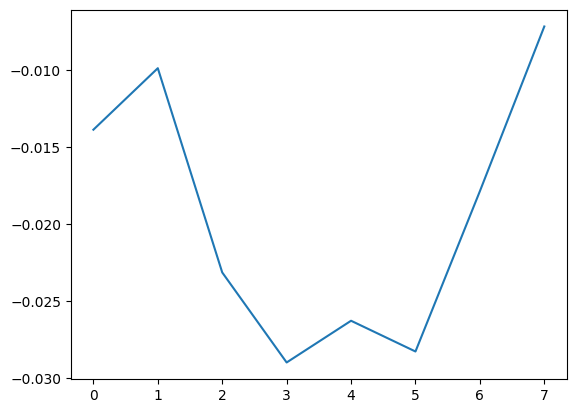

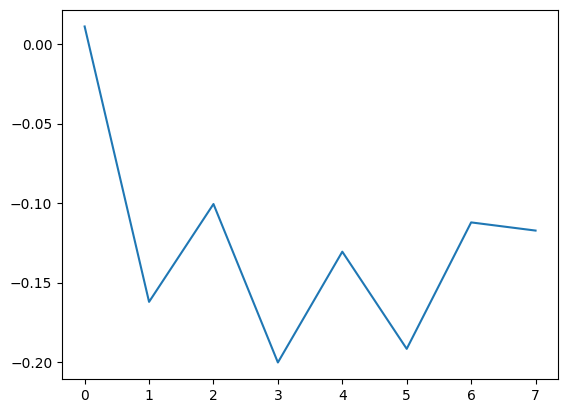

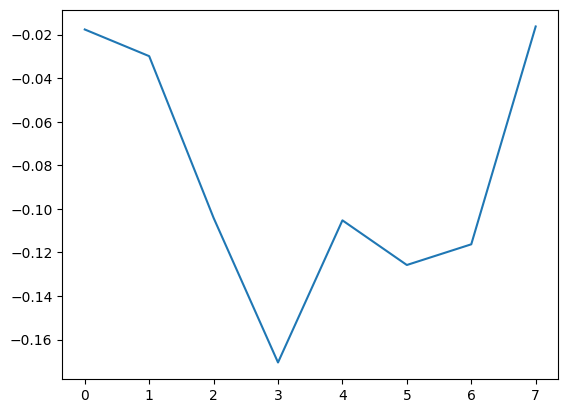

In [4]:
# Aligned data by latency

onset_delay_M = onset_delay[C_cat[0]]
for a in range(1,8):
    temp = onset_delay[C_cat[a]]
    temp2 = np.concat([temp[:,a:8], temp[:,:a]], axis=1)
    onset_delay_M = np.vstack([onset_delay_M, temp2])

idx_c =[0]
for a in range(8):
    idx_c.append(len(C_cat[a][0]))
idx_c = np.cumsum(idx_c)

for a in range(8):
    plt.figure()
    plt.plot(np.mean(onset_delay_M[idx_c[a]:idx_c[a+1]], axis=0))

# Data align

data_cat2 = data_cat[C_cat[0]]
for a in range(1,8):
    temp = data_cat[C_cat[a]]
    temp2 = np.concat([temp[:,a:8], temp[:,:a]], axis=1)
    data_cat2 = np.vstack([data_cat2, temp2])

data_cat2 = np.hstack([data_cat2, data_cat2])  # put dummy for using analysis_pca code
data_cat2 = data_cat2[:,:9]

In [5]:
#For FN angle aligned PCA

apca = analysis_pca.analysis_pca(Ts, data_cat2, save_path)
data_cat_sm = apca.smoothing_data()  # Smoothed data
data = np.mean(data_cat_sm, axis=0)  # Anagle averged data
PCA_total = apca.pca_analy(data)  # PCA

Wa = PCA_total['v'][:4]  # Wight matrix from angle averaged PCA

Dimensions: 1, Variance explained: 75.06%
Dimensions: 2, Variance explained: 85.13%
Dimensions: 3, Variance explained: 90.34%
Dimensions: 4, Variance explained: 93.95%
Dimensions: 5, Variance explained: 96.15%
Dimensions to be reduced: 3


In [6]:
#For FN angle original PCA

data_cat = np.hstack([data_cat, data_cat])  # put dummy for using analysis_pca code
data_cat = data_cat[:,:9]
apca = analysis_pca.analysis_pca(Ts, data_cat, save_path)
data_cat_sm2 = apca.smoothing_data()  # Smoothed data
data2 = np.mean(data_cat_sm2, axis=0)  # Anagle averged data
PCA_total2 = apca.pca_analy(data2)  # PCA

Wa2 = PCA_total2['v'][:4]  # Wight matrix from angle averaged PCA

Dimensions: 1, Variance explained: 75.06%
Dimensions: 2, Variance explained: 85.13%
Dimensions: 3, Variance explained: 90.34%
Dimensions: 4, Variance explained: 93.95%
Dimensions: 5, Variance explained: 96.15%
Dimensions to be reduced: 3


In [7]:
#Multiply weight matrix (MWM) to each angle data

final_out = []
for a in range(8):
    out = Wa @ data_cat_sm[a]
    final_out.append(out)

final_out = np.array(final_out)

In [8]:
#Multiply weight matrix (MWM) to each angle data2 (original)

final_out2 = []
for a in range(8):
    out = Wa2 @ data_cat_sm2[a]
    final_out2.append(out)

final_out2 = np.array(final_out2)

In [9]:
#Adjust MWM by subtract data point at -300 to -200ms

tmep_final = np.transpose(final_out,[2,0,1])
sTemplet = np.mean(tmep_final[:100], axis=0)
sTemplet = np.repeat(sTemplet[np.newaxis, :, :], 600, axis=0)
nfinal_out = np.transpose(tmep_final - sTemplet, [1, 2, 0])


#Adjust PCA by subtract data point at -300 to -200ms

tmep_final = PCA_total['p']
sTemplet = np.mean(tmep_final[:100], axis=0)
sTemplet = np.repeat(sTemplet[np.newaxis, :], 600, axis=0)
nPCA_out = tmep_final.T - sTemplet.T

In [10]:
#Adjust MWM by subtract data point at -300 to -200ms (original)

tmep_final2 = np.transpose(final_out2,[2,0,1])
sTemplet2 = np.mean(tmep_final2[:100], axis=0)
sTemplet2 = np.repeat(sTemplet2[np.newaxis, :, :], 600, axis=0)
nfinal_out2 = np.transpose(tmep_final2 - sTemplet2, [1, 2, 0])


#Adjust PCA by subtract data point at -300 to -200ms (original)

tmep_final2 = PCA_total2['p']
sTemplet2 = np.mean(tmep_final2[:100], axis=0)
sTemplet2 = np.repeat(sTemplet2[np.newaxis, :], 600, axis=0)
nPCA_out2 = tmep_final2.T - sTemplet2.T

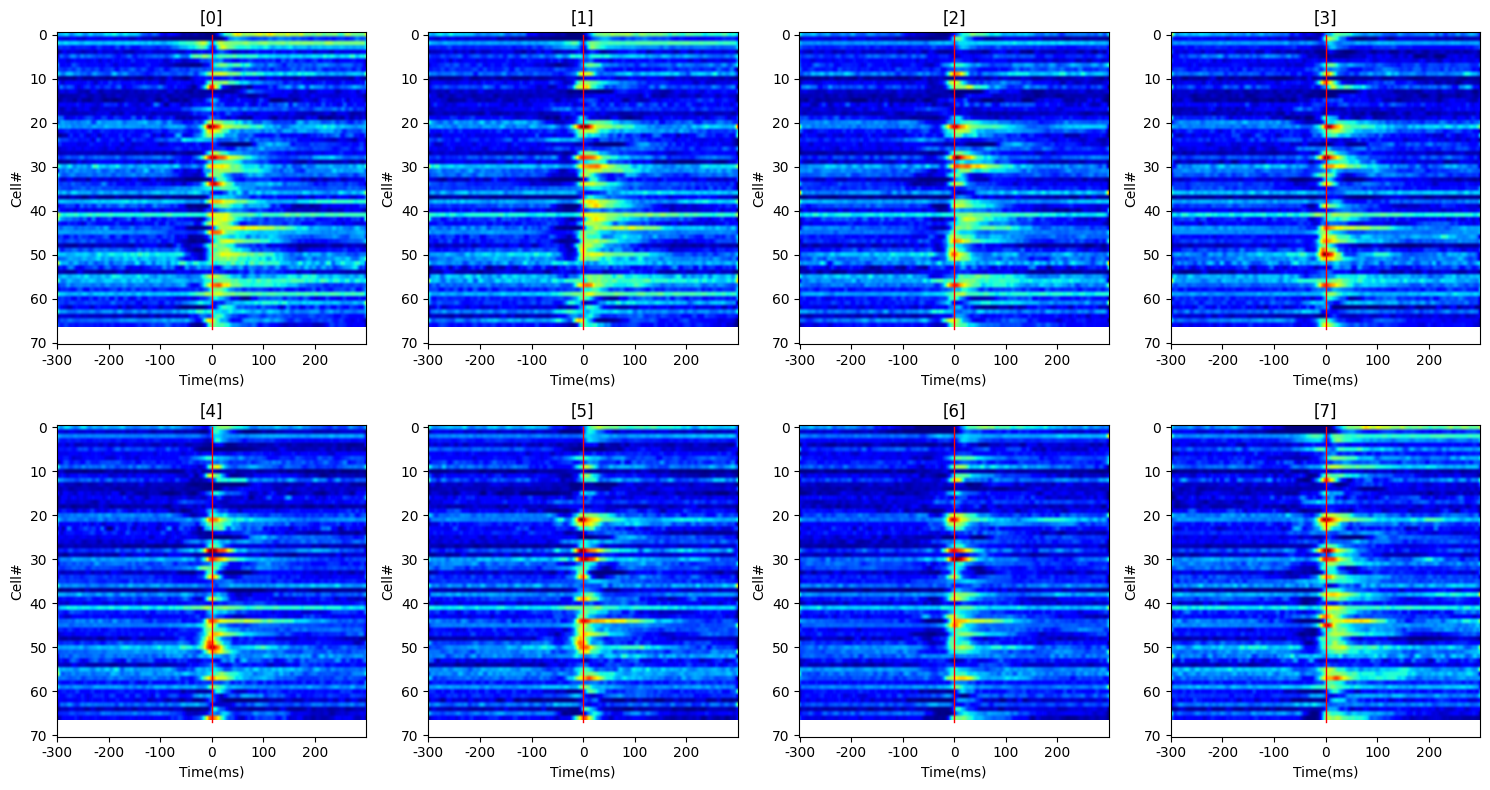

In [11]:
# Plotting raw data of each orientation
# label_ori = ['Up', 'Up right', 'Right', 'Down right',
#              'Down', 'Down left', 'Left', 'Up left']

fig, axes = plt.subplots(2, 4, figsize=(15, 8))

c = 0
for a in range(8):
# for a in [2, 1, 0, 7, 6, 5, 4, 3]: # right to down right, anticlock-wise
    ax = axes[a // 4, a % 4]  # Determine the subplot location
    ax.imshow(data_cat_sm[a], aspect='auto', cmap='jet', origin='upper')  # Display the data
    ax.plot([300, 300], [0, len(data_cat_sm[0])], 'r', linewidth=1)  # Red vertical line
    ax.set_xticks(np.arange(0, 600, 100))  # Set X ticks
    ax.set_xticklabels(np.arange(-300, 300, 100))  # Set X tick labels
    # ax.set_title(label_ori[c])  # Set the title for each subplot
    ax.set_title([c])  # Set the title for each subplot
    ax.set_ylabel("Cell#")  # Set Y-axis label
    ax.set_xlabel("Time(ms)")  # Set X-axis label
    c = c + 1

plt.tight_layout()

plt.savefig('raw.jpg', dpi=300)
plt.show()

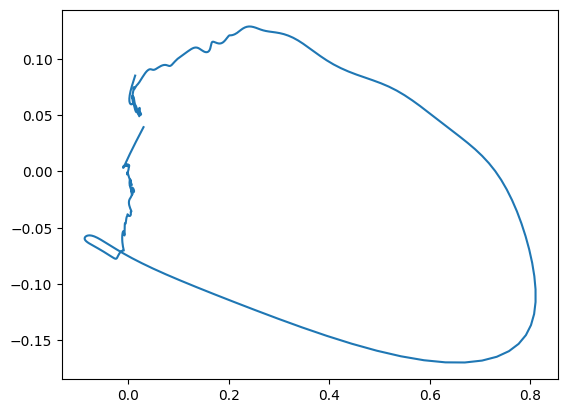

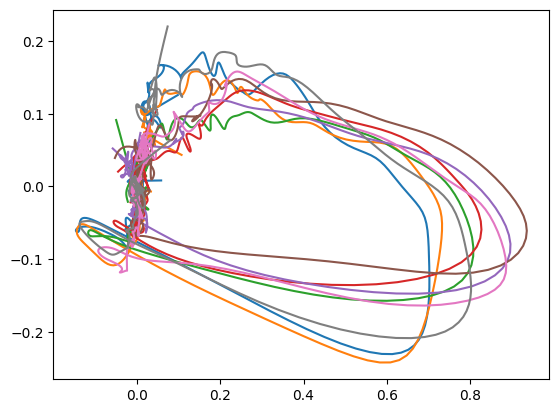

In [12]:
# Plotting

plt.figure()
plt.plot(nPCA_out[0], nPCA_out[1])

plt.figure()
for a in range(8):
    plt.plot(nfinal_out[a][0], nfinal_out[a][1])

Text(0.5, 0, '3D')

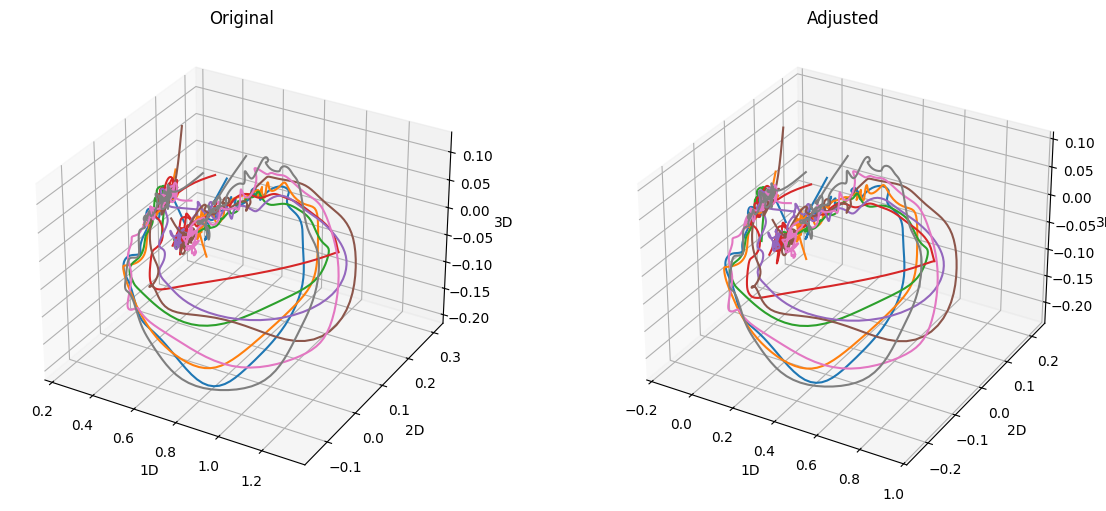

In [13]:
fig = plt.figure(constrained_layout=True,figsize=(12,5))
# subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1, 1])

# 3D plot of original data

# subfigs[0].subplots(1, 1)
ax = fig.add_subplot(1, 2, 1, projection='3d')
for a in range(8):
    X = final_out[a, 0]; Y = final_out[a, 1]; Z = final_out[a, 2]
    ax.plot(X, Y, Z, label='parametric curve')
ax.set_title("Original")
ax.set_xlabel('1D'); ax.set_ylabel('2D'); ax.set_zlabel('3D')

# 3D plot of adjusted data

# subfigs[1].subplots(1, 1, projection='3d')
ax = fig.add_subplot(1, 2, 2, projection='3d')
# ax = plt.figure().add_subplot(projection='3d')
for a in range(8):
    X = nfinal_out[a, 0]; Y = nfinal_out[a, 1]; Z = nfinal_out[a, 2]
    ax.plot(X, Y, Z, label='parametric curve')
ax.set_title("Adjusted")
ax.set_xlabel('1D'); ax.set_ylabel('2D'); ax.set_zlabel('3D')

# ax.view_init(elev=0, azim=-120)

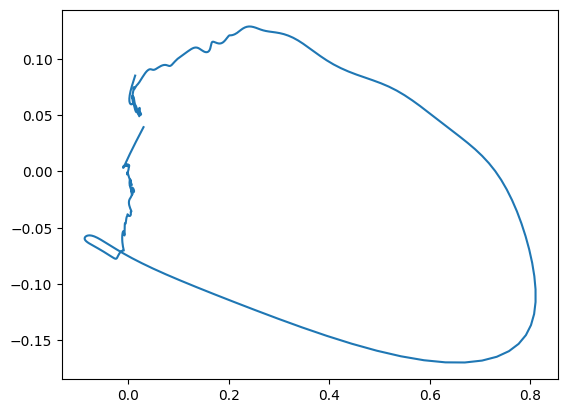

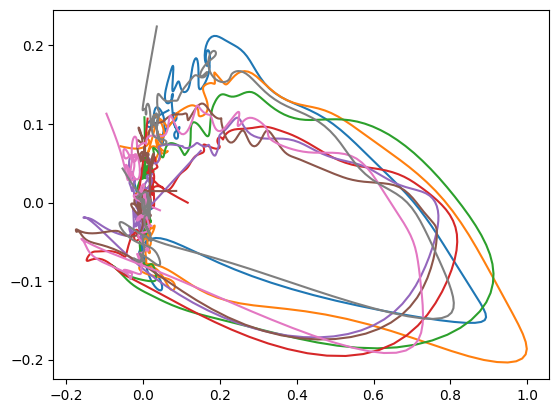

In [14]:
# Plotting (angle original)

plt.figure()
plt.plot(nPCA_out2[0], nPCA_out2[1])

plt.figure()
for a in range(8):
    plt.plot(nfinal_out2[a][0], nfinal_out2[a][1])

Text(0.5, 0, '3D')

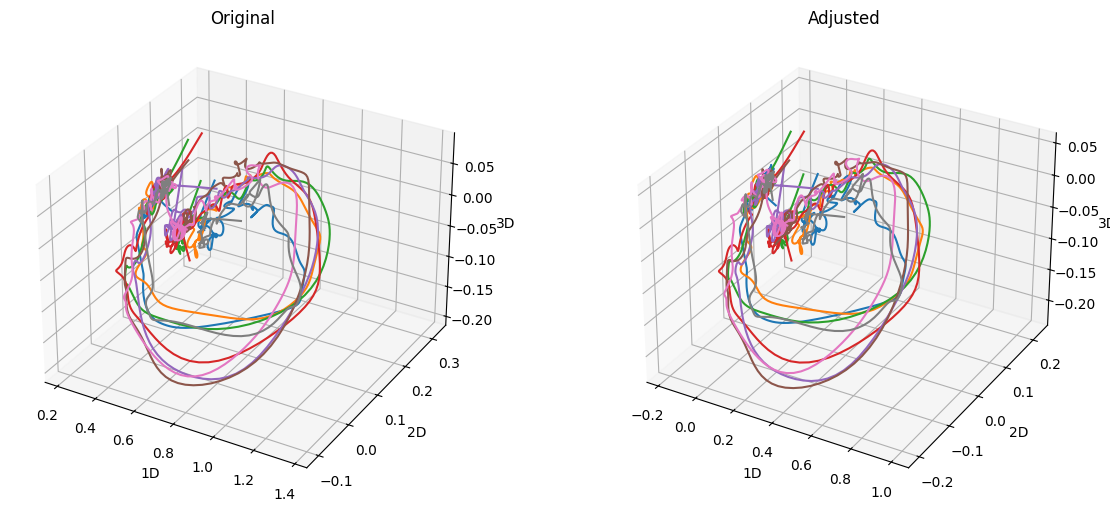

In [15]:
# original

fig = plt.figure(constrained_layout=True,figsize=(12,5))
# subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1, 1])

# 3D plot of original data

# subfigs[0].subplots(1, 1)
ax = fig.add_subplot(1, 2, 1, projection='3d')
for a in range(8):
    X = final_out2[a, 0]; Y = final_out2[a, 1]; Z = final_out2[a, 2]
    ax.plot(X, Y, Z, label='parametric curve')
ax.set_title("Original")
ax.set_xlabel('1D'); ax.set_ylabel('2D'); ax.set_zlabel('3D')

# 3D plot of adjusted data

# subfigs[1].subplots(1, 1, projection='3d')
ax = fig.add_subplot(1, 2, 2, projection='3d')
# ax = plt.figure().add_subplot(projection='3d')
for a in range(8):
    X = nfinal_out2[a, 0]; Y = nfinal_out2[a, 1]; Z = nfinal_out2[a, 2]
    ax.plot(X, Y, Z, label='parametric curve')
ax.set_title("Adjusted")
ax.set_xlabel('1D'); ax.set_ylabel('2D'); ax.set_zlabel('3D')

# ax.view_init(elev=0, azim=-120)

In [16]:
X = final_out2[:, 0]; Y = final_out2[:, 1]; Z = final_out2[:, 2]

In [17]:
np.hstack([X[:, 280], X[0, 280]])

array([0.51509763, 0.59466893, 0.55191789, 0.4175347 , 0.37104326,
       0.28743432, 0.30856759, 0.44146591, 0.51509763])

In [18]:
X

array([[0.35608135, 0.36142318, 0.36633653, ..., 0.42082066, 0.43546646,
        0.45160018],
       [0.38087033, 0.38235322, 0.38351092, ..., 0.3396334 , 0.32746141,
        0.31488639],
       [0.40995996, 0.39943898, 0.38974085, ..., 0.38968658, 0.38915855,
        0.38851456],
       ...,
       [0.48073741, 0.46282769, 0.44592365, ..., 0.41266914, 0.41228244,
        0.41213097],
       [0.43511468, 0.42064404, 0.40708606, ..., 0.3160599 , 0.30621845,
        0.29575787],
       [0.32988093, 0.33825921, 0.34631713, ..., 0.4038792 , 0.4112442 ,
        0.41903308]], shape=(8, 600))

In [ ]:
# Pretty figure

from matplotlib.markers import CARETUP
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# color map
cmap = matplotlib.colormaps.get_cmap("gist_rainbow")
C_list = cmap( np.linspace(0.0, 1.0, 8) ) # extract 20 colors from cmap

fig = plt.figure(constrained_layout=True,figsize=(12,5))
# subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1, 1])

# 3D plot of angle original data

# subfigs[0].subplots(1, 1)
ax = fig.add_subplot(1, 2, 1, projection='3d')
for a in range(8):
    X = final_out2[a, 0]; Y = final_out2[a, 1]; Z = final_out2[a, 2]
    ax.plot(X[200:500], Y[200:500], Z[200:500], label='parametric curve', color = C_list[a], linewidth = 0.5)

    ax.scatter(X[280], Y[280], Z[280], s=60, color = C_list[a], facecolors=C_list[a], edgecolors='black')
    ax.scatter(X[300], Y[300], Z[300], marker='^', s=60, color = C_list[a], facecolors = C_list[a], edgecolors='black')
# X = final_out2[:, 0]; Y = final_out2[:, 1]; Z = final_out2[:, 2]
# ax.plot(np.hstack([X[:, 280], X[0, 280]]),
#         np.hstack([Y[:, 280], Y[0, 280]]),
#         np.hstack([Z[:, 280], Z[0, 280]]),
#         ls = '-', color = 'k')
# ax.plot(np.hstack([X[:, 300], X[0, 300]]),
#         np.hstack([Y[:, 300], Y[0, 300]]),
#         np.hstack([Z[:, 300], Z[0, 300]]),
#         ls = '-', color = 'k')


ax.set_title("Original")
ax.set_xlabel('1D'); ax.set_ylabel('2D'); ax.set_zlabel('3D')


# 3D plot of angle aligned data

# subfigs[0].subplots(1, 1)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
for a in range(8):
    X = final_out[a, 0]; Y = final_out[a, 1]; Z = final_out[a, 2]
    ax2.plot(X[200:500], Y[200:500], Z[200:500], label='parametric curve', color = C_list[a], linewidth = 0.5)
    ax2.scatter(X[280], Y[280], Z[280], s=60, color = C_list[a], facecolors=C_list[a], edgecolors='black')
    ax2.scatter(X[300], Y[300], Z[300], marker='^', s=60, color = C_list[a], facecolors = C_list[a], edgecolors='black')
# X = final_out[:, 0]; Y = final_out[:, 1]; Z = final_out[:, 2]
# ax2.plot(np.hstack([X[:, 280], X[0, 280]]),
#         np.hstack([Y[:, 280], Y[0, 280]]),
#         np.hstack([Z[:, 280], Z[0, 280]]),
#         ls = '-', color = 'k')
# ax2.plot(np.hstack([X[:, 300], X[0, 300]]),
#         np.hstack([Y[:, 300], Y[0, 300]]),
#         np.hstack([Z[:, 300], Z[0, 300]]),
#         ls = '-', color = 'k')


ax2.set_title("Aligned")
ax2.set_xlabel('1D'); ax2.set_ylabel('2D'); ax2.set_zlabel('3D')

# animation
def run(frame_number):
    ax.view_init(azim=225 + frame_number*2)
    ax2.view_init(azim=225 + frame_number*2)

anim = FuncAnimation(fig, run, frames=180, interval=20)

HTML(anim.to_jshtml())
# plt.show()

# anim.save('scatter.gif', writer='imagemagick', fps=25, dpi=80)

C:\Users\IBS\AppData\Local\Temp\ipykernel_17104\270087718.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker (6).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[300], Y[300], Z[300], marker=CARETUP, s=60, color = C_list[a], facecolors = C_list[a], edgecolors='black')
Animation size has reached 20998190 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


In [ ]:
# Fitting

pca_p = nPCA_out[:4]
time = np.linspace(-300, 300, 600)

r_s_total = []
for a in range(8):
    resid = np.linalg.norm(pca_p - nfinal_out[a], axis=1)**2
    r_s = 1 - resid / (final_out[a].size * nfinal_out[a].var())
    r_s_total.append(r_s)

r_s_total = np.array(r_s_total)

In [ ]:
# Plotting

a = 1
b = 0

r_s = r_s_total[a][b]
plt.plot(time, pca_p[b], time, nfinal_out[a][b], 'r')
plt.title(f'direction={a}, pc={b}, R^2={r_s}')

In [9]:
# a=24
# t = np.arange(-250,250)
# plt.plot(t, pFN[a], t, pMPC @ betas[a], 'r')
# resid = np.linalg.norm(pMPC @ betas[a] - pFN[a])**2
# r_s = 1 - resid / (pFN[a].size * pFN[a].var())`a
# plt.title(f'a={a}, R^2={r_s}')

NameError: name 'pFN' is not defined